🔄 Loading Heart Disease Dataset...
✅ Dataset loaded: 918 patients, 12 features

🔍 Data Quality Check:
✅ No missing values
⚠️  RestingBP: 1 zero values (likely missing data)
⚠️  Cholesterol: 172 zero values (likely missing data)

📊 Target Distribution:
   No Heart Disease: 410 (44.7%)
   Heart Disease: 508 (55.3%)

🔧 Cleaning Data...
✅ Fixed RestingBP zero values with median: 130.0
✅ Fixed Cholesterol zero values with median: 237.0

⚙️ Creating Advanced Features...
✅ Created 6 new features:
   • Age_Risk: Age-based risk categories
   • BP_Risk: Blood pressure risk levels
   • Chol_Risk: Cholesterol risk categories
   • HR_Reserve: Heart rate reserve
   • Composite_Risk: Combined risk score
   • Exercise_Capacity: Exercise capacity percentage

🔤 Smart Categorical Encoding...
   ✅ ChestPainType: Encoded based on medical severity/risk
   ✅ RestingECG: Encoded based on medical severity/risk
   ✅ ST_Slope: Encoded based on medical severity/risk
   ✅ Sex: Encoded based on medical severity/ris

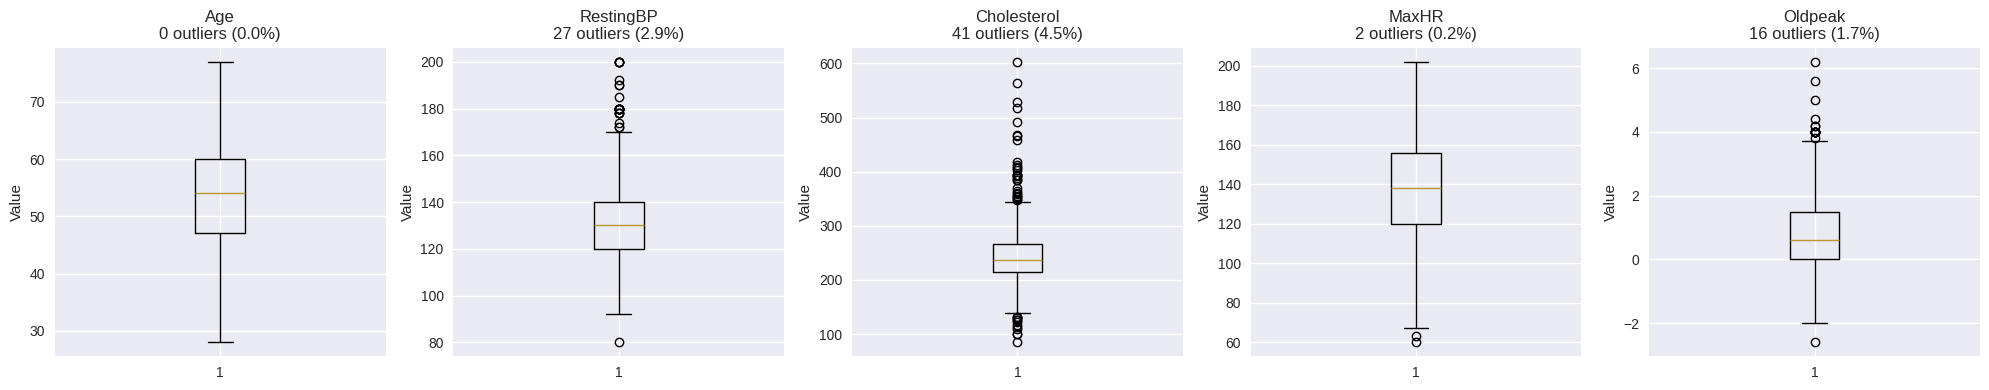

📊 Outlier Summary:
   Age: 0 outliers (0.0%)
   RestingBP: 27 outliers (2.9%)
   Cholesterol: 41 outliers (4.5%)
   MaxHR: 2 outliers (0.2%)
   Oldpeak: 16 outliers (1.7%)

🎯 Feature Selection (top 15 features)...


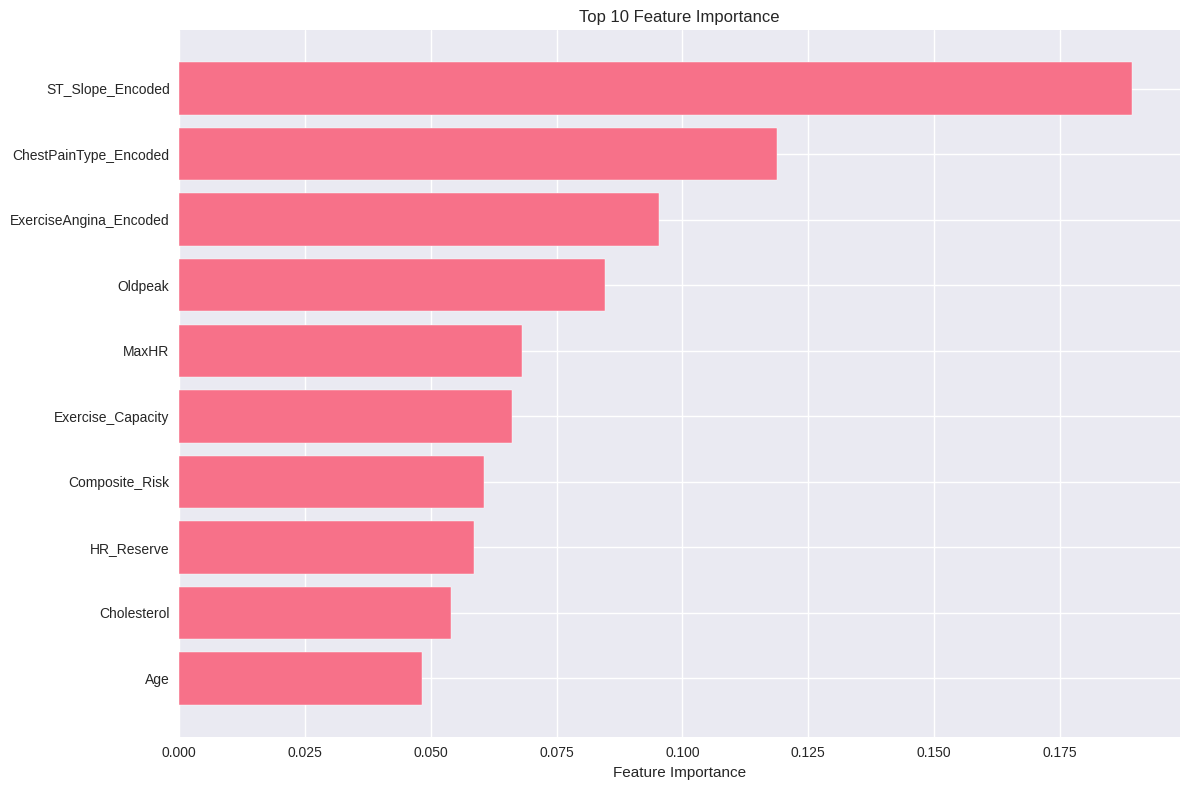

✅ Selected 15 most important features:
    1. ST_Slope_Encoded: 0.1894
    2. ChestPainType_Encoded: 0.1189
    3. ExerciseAngina_Encoded: 0.0954
    4. Oldpeak: 0.0846
    5. MaxHR: 0.0681
    6. Exercise_Capacity: 0.0661
    7. Composite_Risk: 0.0605
    8. HR_Reserve: 0.0585
    9. Cholesterol: 0.0539
   10. Age: 0.0482

🎯 Final Dataset Preparation...
✅ Features scaled using RobustScaler
✅ Dataset prepared:
   • Total samples: 918
   • Features: 15
   • Training set: 734 samples
   • Test set: 184 samples
   • Target balance - Train: {1: 406, 0: 328}
   • Target balance - Test: {1: 102, 0: 82}

✅ Data Quality Validation...
   • Mean difference between train/test: 0.0663 (should be small)
   ✅ All features have sufficient variance
   ✅ No constant features
   • Average |correlation| with target: 0.2988

📊 Creating Final Data Visualizations...


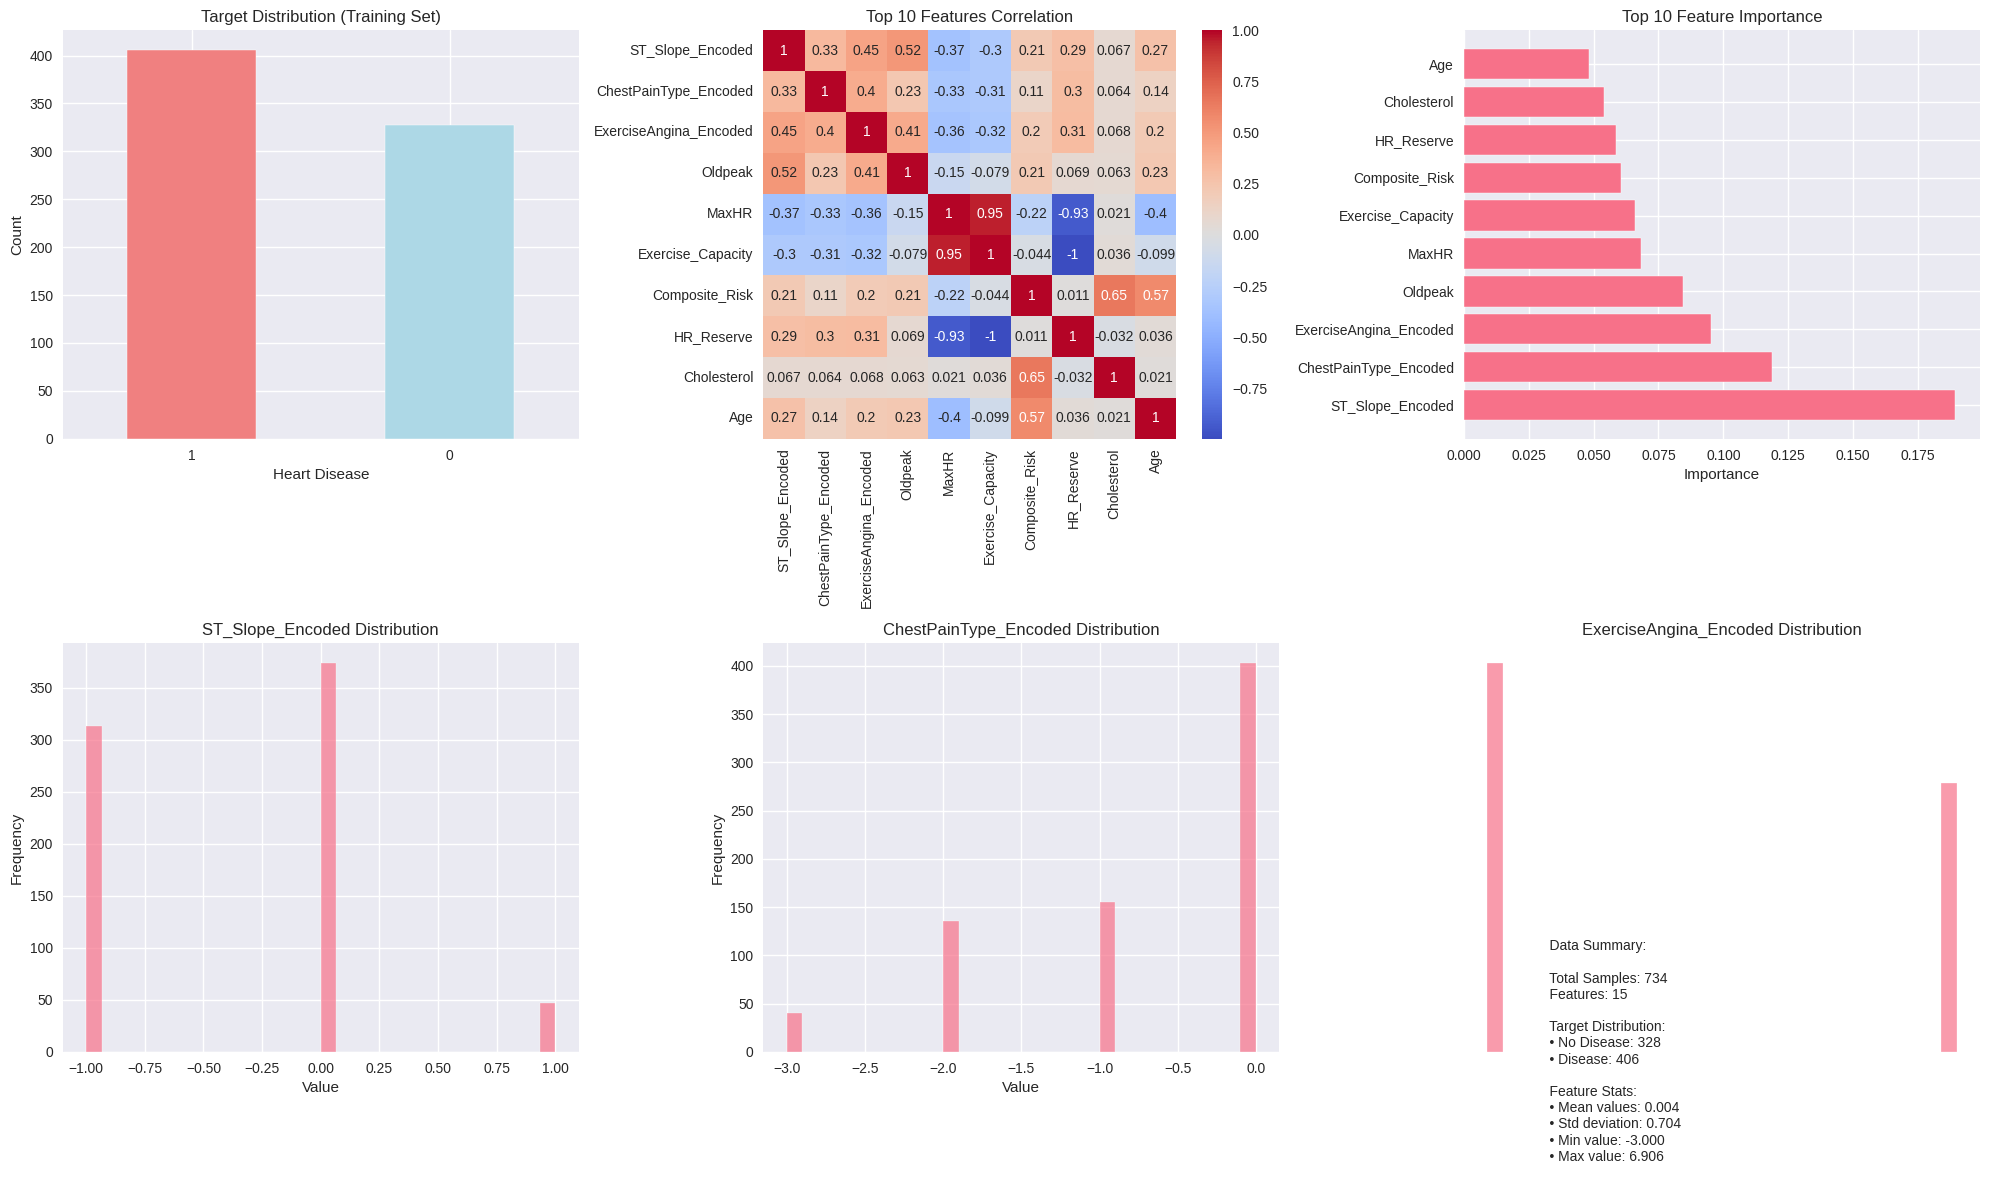


🚀 Quick Model Validation...

Random Forest:
   • Train Accuracy: 1.0000
   • Test Accuracy: 0.8533
   • CV Accuracy: 0.8515 (±0.0216)

Logistic Regression:
   • Train Accuracy: 0.8474
   • Test Accuracy: 0.8587
   • CV Accuracy: 0.8474 (±0.0271)

🔥 Preparing PyTorch Data...
✅ PyTorch data prepared:
   • Batch size: 32
   • Train batches: 23
   • Test batches: 6
   • Input features: 15

🎉 ENHANCED DATA PREPARATION COMPLETED!

📊 FINAL DATASET SUMMARY:
• Original dataset: 918 samples, 12 features
• Final dataset: 734 train + 184 test samples
• Selected features: 15
• Data quality: All zeros handled, features scaled
• Target balance: {1: np.int64(406), 0: np.int64(328)}

🔧 PREPROCESSING STEPS COMPLETED:
✅ Data loading and exploration
✅ Data cleaning (zero value imputation)
✅ Advanced feature engineering (6 new features)
✅ Smart categorical encoding
✅ Outlier detection and analysis
✅ Feature selection (Random Forest importance)
✅ Robust scaling for numerical stability
✅ Stratified train-te

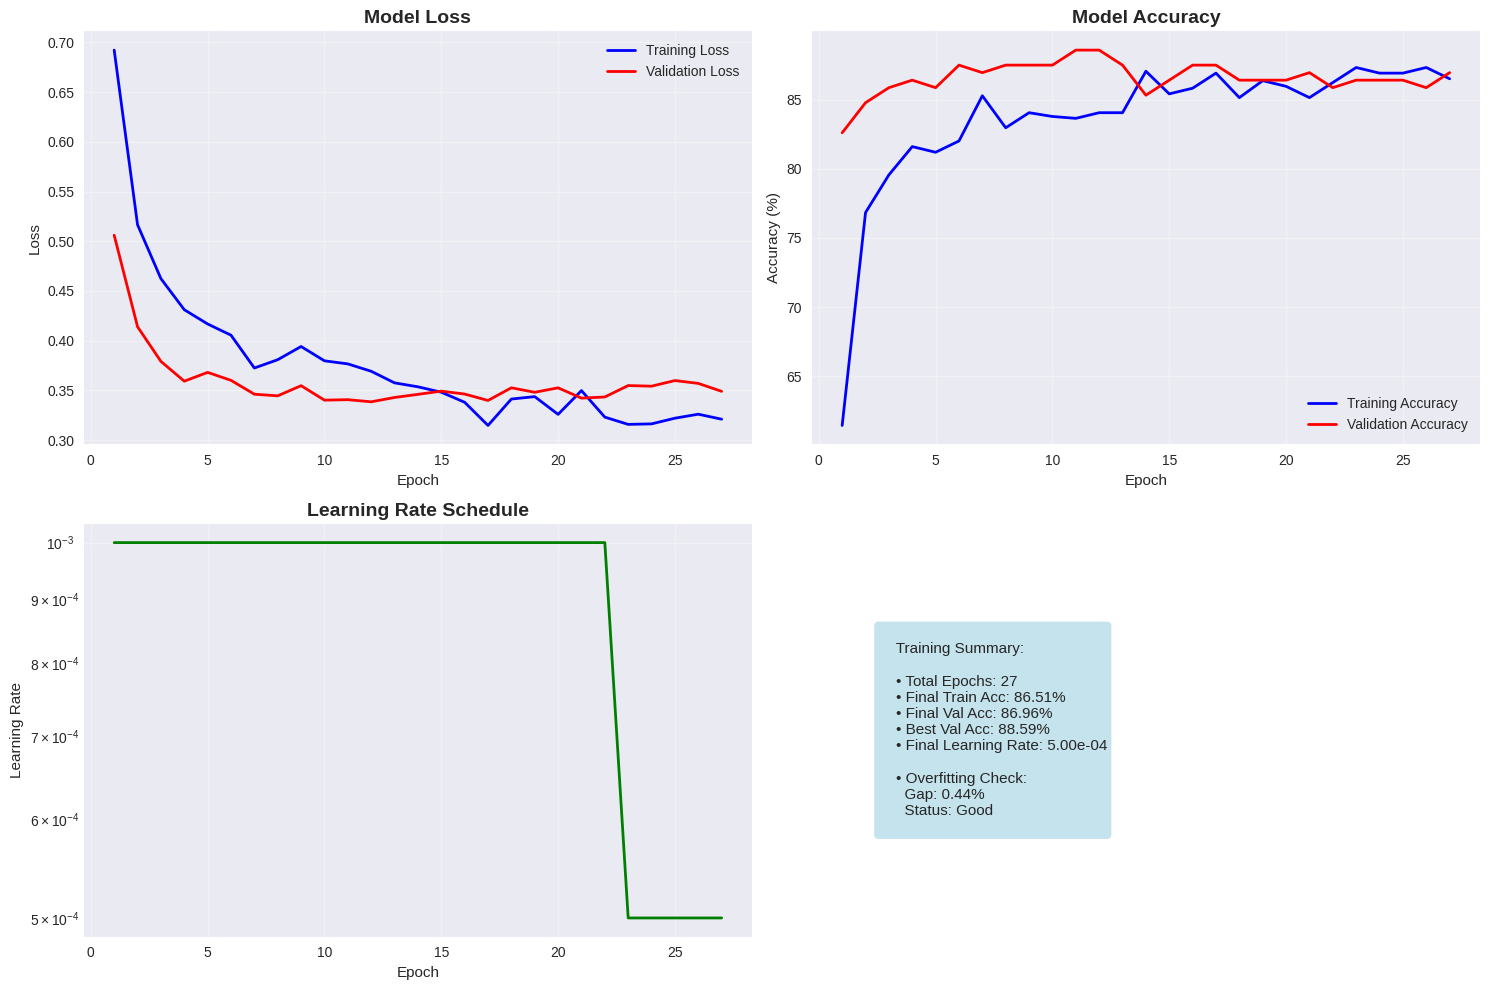

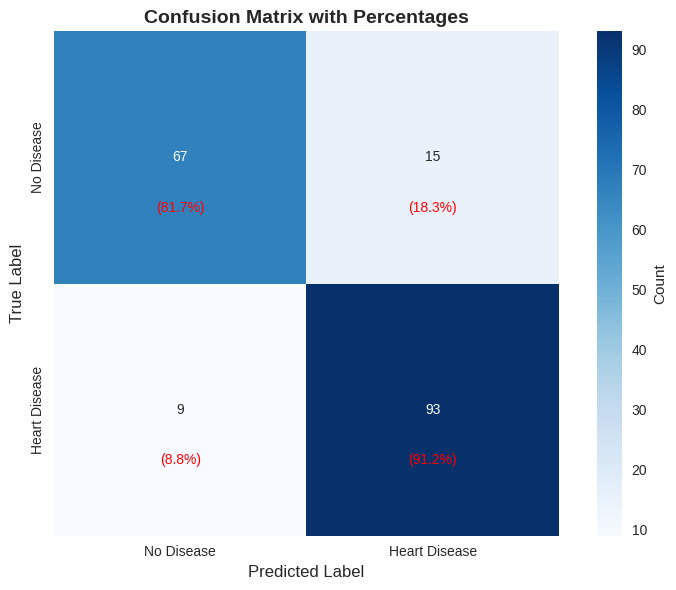


📊 MODEL COMPARISON SUMMARY
🤖 Model Performance Comparison:
----------------------------------------
Random Forest:
   Test Accuracy: 0.8533
   CV Accuracy:   0.8515 ± 0.0216
Logistic Regression:
   Test Accuracy: 0.8587
   CV Accuracy:   0.8474 ± 0.0271

PyTorch Neural Network:
   Test Accuracy: 0.8696
   AUC-ROC:       0.9219
   F1-Score:      0.8857

🏆 Performance Summary:
   Best Sklearn Model: 0.8587
   PyTorch Model:      0.8696
   Winner: PyTorch 🎉

💾 Model and preprocessing objects saved to: ./models/
   📄 heart_disease_model.pth - Model weights
   📄 preprocessing_objects.pkl - Scaler and feature info

🎉 PYTORCH TRAINING COMPLETED SUCCESSFULLY!
🚀 Your enhanced heart disease prediction model is ready for deployment!
💡 Use the saved model files for making predictions on new data.


In [5]:
# Enhanced Heart Disease Data Preparation Notebook
# ================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings('ignore')

# ==========================================
# 1. ENHANCED DATA LOADING & EXPLORATION
# ==========================================

def load_and_explore_data(file_path):
    """Enhanced data loading with comprehensive exploration"""
    print("🔄 Loading Heart Disease Dataset...")
    df = pd.read_csv(file_path)

    print(f"✅ Dataset loaded: {df.shape[0]} patients, {df.shape[1]} features")

    # Check for data quality issues
    print("\n🔍 Data Quality Check:")

    # Missing values
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print("❌ Missing values found:")
        for col, count in missing[missing > 0].items():
            print(f"   {col}: {count}")
    else:
        print("✅ No missing values")

    # Zero values in medical measurements (likely missing)
    medical_cols = ['RestingBP', 'Cholesterol']
    for col in medical_cols:
        zero_count = (df[col] == 0).sum()
        if zero_count > 0:
            print(f"⚠️  {col}: {zero_count} zero values (likely missing data)")

    # Target distribution
    target_dist = df['HeartDisease'].value_counts()
    print(f"\n📊 Target Distribution:")
    print(f"   No Heart Disease: {target_dist[0]} ({target_dist[0]/len(df)*100:.1f}%)")
    print(f"   Heart Disease: {target_dist[1]} ({target_dist[1]/len(df)*100:.1f}%)")

    return df

# Load data
df = load_and_explore_data('data/heart.csv')

# ==========================================
# 2. DATA CLEANING & QUALITY IMPROVEMENT
# ==========================================

def clean_data(df):
    """Clean data by handling missing/zero values"""
    print("\n🔧 Cleaning Data...")
    df_clean = df.copy()

    # Fix zero values in RestingBP (blood pressure cannot be 0)
    if (df_clean['RestingBP'] == 0).sum() > 0:
        median_bp = df_clean[df_clean['RestingBP'] > 0]['RestingBP'].median()
        df_clean.loc[df_clean['RestingBP'] == 0, 'RestingBP'] = median_bp
        print(f"✅ Fixed RestingBP zero values with median: {median_bp}")

    # Fix zero values in Cholesterol
    if (df_clean['Cholesterol'] == 0).sum() > 0:
        median_chol = df_clean[df_clean['Cholesterol'] > 0]['Cholesterol'].median()
        df_clean.loc[df_clean['Cholesterol'] == 0, 'Cholesterol'] = median_chol
        print(f"✅ Fixed Cholesterol zero values with median: {median_chol}")

    return df_clean

df_clean = clean_data(df)

# ==========================================
# 3. ADVANCED FEATURE ENGINEERING
# ==========================================

def create_advanced_features(df):
    """Create medically meaningful features"""
    print("\n⚙️ Creating Advanced Features...")
    df_features = df.copy()

    # 1. Age risk groups
    df_features['Age_Risk'] = pd.cut(df_features['Age'],
                                   bins=[0, 45, 55, 65, 100],
                                   labels=[0, 1, 2, 3])  # Low to High risk

    # 2. Blood pressure categories (AHA guidelines)
    def bp_category(bp):
        if bp < 120: return 0      # Normal
        elif bp < 130: return 1    # Elevated
        elif bp < 140: return 2    # Stage 1 Hypertension
        else: return 3             # Stage 2 Hypertension

    df_features['BP_Risk'] = df_features['RestingBP'].apply(bp_category)

    # 3. Cholesterol risk levels
    def chol_risk(chol):
        if chol < 200: return 0    # Desirable
        elif chol < 240: return 1  # Borderline high
        else: return 2             # High

    df_features['Chol_Risk'] = df_features['Cholesterol'].apply(chol_risk)

    # 4. Heart rate reserve (fitness indicator)
    max_hr_predicted = 220 - df_features['Age']
    df_features['HR_Reserve'] = max_hr_predicted - df_features['MaxHR']

    # 5. Composite risk score
    risk_factors = ['Age', 'RestingBP', 'Cholesterol']
    scaler_temp = RobustScaler()
    risk_scaled = scaler_temp.fit_transform(df_features[risk_factors])
    df_features['Composite_Risk'] = np.mean(risk_scaled, axis=1)

    # 6. Exercise capacity indicator
    df_features['Exercise_Capacity'] = (df_features['MaxHR'] / (220 - df_features['Age'])) * 100

    print("✅ Created 6 new features:")
    print("   • Age_Risk: Age-based risk categories")
    print("   • BP_Risk: Blood pressure risk levels")
    print("   • Chol_Risk: Cholesterol risk categories")
    print("   • HR_Reserve: Heart rate reserve")
    print("   • Composite_Risk: Combined risk score")
    print("   • Exercise_Capacity: Exercise capacity percentage")

    return df_features

df_features = create_advanced_features(df_clean)

# ==========================================
# 4. SMART CATEGORICAL ENCODING
# ==========================================

def encode_categorical_smart(df):
    """Encode categorical variables based on medical severity/risk"""
    print("\n🔤 Smart Categorical Encoding...")
    df_encoded = df.copy()

    # Ordinal encoding based on medical severity
    ordinal_mappings = {
        'ChestPainType': {'TA': 1, 'ATA': 2, 'NAP': 3, 'ASY': 4},  # Typical Angina → Asymptomatic (severity)
        'RestingECG': {'Normal': 0, 'ST': 1, 'LVH': 2},  # Normal → Left Ventricular Hypertrophy
        'ST_Slope': {'Up': 0, 'Flat': 1, 'Down': 2},  # Upsloping → Downsloping (risk)
        'Sex': {'F': 0, 'M': 1},  # Binary
        'ExerciseAngina': {'N': 0, 'Y': 1},  # Binary
    }

    for col, mapping in ordinal_mappings.items():
        df_encoded[f'{col}_Encoded'] = df_encoded[col].map(mapping)
        print(f"   ✅ {col}: Encoded based on medical severity/risk")

    return df_encoded

df_encoded = encode_categorical_smart(df_features)

# ==========================================
# 5. OUTLIER DETECTION & HANDLING
# ==========================================

def detect_and_handle_outliers(df, method='iqr'):
    """Detect and optionally handle outliers"""
    print(f"\n🔍 Outlier Detection using {method.upper()} method...")

    numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    outlier_info = {}

    fig, axes = plt.subplots(1, len(numerical_cols), figsize=(20, 4))

    for i, col in enumerate(numerical_cols):
        # IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = {
            'count': len(outliers),
            'percentage': len(outliers) / len(df) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

        # Visualization
        axes[i].boxplot(df[col])
        axes[i].set_title(f'{col}\n{len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)')
        axes[i].set_ylabel('Value')

    plt.tight_layout()
    plt.show()

    # Print summary
    print("📊 Outlier Summary:")
    for col, info in outlier_info.items():
        print(f"   {col}: {info['count']} outliers ({info['percentage']:.1f}%)")

    return outlier_info

outlier_info = detect_and_handle_outliers(df_encoded)

# ==========================================
# 6. FEATURE SELECTION & IMPORTANCE
# ==========================================

def select_best_features(df, target_col='HeartDisease', n_features=15):
    """Select best features using Random Forest importance"""
    print(f"\n🎯 Feature Selection (top {n_features} features)...")

    # Prepare features (exclude target and original categorical)
    exclude_cols = [target_col, 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    feature_cols = [col for col in df.columns if col not in exclude_cols]

    X = df[feature_cols]
    y = df[target_col]

    # Feature importance using Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Create importance dataframe
    importance_df = pd.DataFrame({
        'feature': feature_cols,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

    # Select top features
    top_features = importance_df.head(n_features)['feature'].tolist()

    # Visualization
    top_10_for_plot = importance_df.head(10)
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(top_10_for_plot)), top_10_for_plot['importance'][::-1])
    plt.yticks(range(len(top_10_for_plot)), top_10_for_plot['feature'][::-1])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 10 Feature Importance')
    plt.tight_layout()
    plt.show()

    print(f"✅ Selected {len(top_features)} most important features:")
    for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
        print(f"   {i:2d}. {row['feature']}: {row['importance']:.4f}")

    return top_features, importance_df

selected_features, feature_importance = select_best_features(df_encoded)

# ==========================================
# 7. FINAL DATA PREPARATION
# ==========================================

def prepare_final_dataset(df, selected_features, target_col='HeartDisease',
                          test_size=0.2, scale_features=True):
    """Prepare final clean dataset for training"""
    print("\n🎯 Final Dataset Preparation...")

    # Create feature matrix and target
    X = df[selected_features].copy()
    y = df[target_col].copy()

    # Handle any remaining NaN values
    if X.isnull().sum().sum() > 0:
        print("⚠️  Handling remaining NaN values...")
        X = X.fillna(X.median())

    # Feature scaling using RobustScaler (less sensitive to outliers)
    if scale_features:
        scaler = RobustScaler()
        X_scaled = pd.DataFrame(
            scaler.fit_transform(X),
            columns=X.columns,
            index=X.index
        )
        print("✅ Features scaled using RobustScaler")
    else:
        X_scaled = X
        scaler = None

    # Train-test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=42, stratify=y
    )

    print(f"✅ Dataset prepared:")
    print(f"   • Total samples: {len(X)}")
    print(f"   • Features: {X.shape[1]}")
    print(f"   • Training set: {X_train.shape[0]} samples")
    print(f"   • Test set: {X_test.shape[0]} samples")
    print(f"   • Target balance - Train: {y_train.value_counts().to_dict()}")
    print(f"   • Target balance - Test: {y_test.value_counts().to_dict()}")

    return X_train, X_test, y_train, y_test, scaler

X_train, X_test, y_train, y_test, scaler = prepare_final_dataset(df_encoded, selected_features)

# ==========================================
# 8. DATA QUALITY VALIDATION
# ==========================================

def validate_data_quality(X_train, X_test, y_train, y_test):
    """Validate the quality of prepared data"""
    print("\n✅ Data Quality Validation...")

    # Check for data leakage
    train_mean = X_train.mean()
    test_mean = X_test.mean()
    mean_diff = (train_mean - test_mean).abs().mean()
    print(f"   • Mean difference between train/test: {mean_diff:.4f} (should be small)")

    # Check feature variance
    low_variance_features = X_train.columns[X_train.var() < 0.01].tolist()
    if low_variance_features:
        print(f"   ⚠️  Low variance features: {low_variance_features}")
    else:
        print("   ✅ All features have sufficient variance")

    # Check for constant features
    constant_features = X_train.columns[X_train.nunique() <= 1].tolist()
    if constant_features:
        print(f"   ❌ Constant features found: {constant_features}")
    else:
        print("   ✅ No constant features")

    # Check correlation with target
    correlations = []
    for col in X_train.columns:
        corr = np.corrcoef(X_train[col], y_train)[0, 1]
        correlations.append(abs(corr))

    avg_correlation = np.mean(correlations)
    print(f"   • Average |correlation| with target: {avg_correlation:.4f}")

    return {
        'mean_difference': mean_diff,
        'low_variance_features': low_variance_features,
        'constant_features': constant_features,
        'avg_correlation': avg_correlation
    }

validation_results = validate_data_quality(X_train, X_test, y_train, y_test)

# ==========================================
# 9. VISUALIZATION OF FINAL DATA
# ==========================================

def visualize_final_data(X_train, y_train, feature_importance):
    """Create comprehensive visualizations"""
    print("\n📊 Creating Final Data Visualizations...")

    fig, axes = plt.subplots(2, 3, figsize=(20, 12))

    # 1. Target distribution
    y_train.value_counts().plot(kind='bar', ax=axes[0,0], color=['lightcoral', 'lightblue'])
    axes[0,0].set_title('Target Distribution (Training Set)')
    axes[0,0].set_xlabel('Heart Disease')
    axes[0,0].set_ylabel('Count')
    axes[0,0].tick_params(axis='x', rotation=0)

    # 2. Feature correlation heatmap (top features)
    top_10_features = feature_importance.head(10)['feature'].tolist()
    corr_matrix = X_train[top_10_features].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0,1])
    axes[0,1].set_title('Top 10 Features Correlation')

    # 3. Feature importance
    top_features = feature_importance.head(10)
    axes[0,2].barh(range(len(top_features)), top_features['importance'])
    axes[0,2].set_yticks(range(len(top_features)))
    axes[0,2].set_yticklabels(top_features['feature'])
    axes[0,2].set_xlabel('Importance')
    axes[0,2].set_title('Top 10 Feature Importance')

    # 4. Feature distributions (sample)
    sample_features = X_train.columns[:4]
    for i, feature in enumerate(sample_features):
        row, col = (1, i) if i < 3 else (1, 2)
        if i < 3:
            X_train[feature].hist(bins=30, alpha=0.7, ax=axes[row, col])
            axes[row, col].set_title(f'{feature} Distribution')
            axes[row, col].set_xlabel('Value')
            axes[row, col].set_ylabel('Frequency')

    # 5. Data summary statistics
    axes[1,2].axis('off')
    summary_text = f"""
    Data Summary:

    Total Samples: {len(X_train)}
    Features: {X_train.shape[1]}

    Target Distribution:
    • No Disease: {(y_train == 0).sum()}
    • Disease: {(y_train == 1).sum()}

    Feature Stats:
    • Mean values: {X_train.mean().mean():.3f}
    • Std deviation: {X_train.std().mean():.3f}
    • Min value: {X_train.min().min():.3f}
    • Max value: {X_train.max().max():.3f}
    """
    axes[1,2].text(0.1, 0.5, summary_text, fontsize=10, va='center')

    plt.tight_layout()
    plt.show()

visualize_final_data(X_train, y_train, feature_importance)

# ==========================================
# 10. QUICK MODEL VALIDATION
# ==========================================

def quick_model_validation(X_train, X_test, y_train, y_test):
    """Quick validation with multiple models"""
    print("\n🚀 Quick Model Validation...")

    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
    }

    results = {}

    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Predictions
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

        results[name] = {
            'train_accuracy': train_score,
            'test_accuracy': test_score,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std()
        }

        print(f"\n{name}:")
        print(f"   • Train Accuracy: {train_score:.4f}")
        print(f"   • Test Accuracy: {test_score:.4f}")
        print(f"   • CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    return results

model_results = quick_model_validation(X_train, X_test, y_train, y_test)

# ==========================================
# 11. PYTORCH DATA PREPARATION
# ==========================================

def prepare_pytorch_data(X_train, X_test, y_train, y_test, batch_size=32):
    """Prepare data for PyTorch neural networks"""
    print("\n🔥 Preparing PyTorch Data...")

    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train.values)
    X_test_tensor = torch.FloatTensor(X_test.values)
    y_train_tensor = torch.LongTensor(y_train.values)
    y_test_tensor = torch.LongTensor(y_test.values)

    # Create datasets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    print(f"✅ PyTorch data prepared:")
    print(f"   • Batch size: {batch_size}")
    print(f"   • Train batches: {len(train_loader)}")
    print(f"   • Test batches: {len(test_loader)}")
    print(f"   • Input features: {X_train_tensor.shape[1]}")

    return train_loader, test_loader, X_train_tensor.shape[1]

train_loader, test_loader, input_size = prepare_pytorch_data(X_train, X_test, y_train, y_test)

# ==========================================
# 12. SUMMARY REPORT
# ==========================================

print("\n" + "="*80)
print("🎉 ENHANCED DATA PREPARATION COMPLETED!")
print("="*80)

print(f"""
📊 FINAL DATASET SUMMARY:
{'='*50}
• Original dataset: {df.shape[0]} samples, {df.shape[1]} features
• Final dataset: {X_train.shape[0]} train + {X_test.shape[0]} test samples
• Selected features: {len(selected_features)}
• Data quality: All zeros handled, features scaled
• Target balance: {dict(y_train.value_counts())}

🔧 PREPROCESSING STEPS COMPLETED:
{'='*50}
✅ Data loading and exploration
✅ Data cleaning (zero value imputation)
✅ Advanced feature engineering (6 new features)
✅ Smart categorical encoding
✅ Outlier detection and analysis
✅ Feature selection (Random Forest importance)
✅ Robust scaling for numerical stability
✅ Stratified train-test split
✅ Data quality validation
✅ PyTorch data preparation

🚀 READY FOR TRAINING:
{'='*50}
• Scikit-learn compatible: X_train, X_test, y_train, y_test
• PyTorch compatible: train_loader, test_loader
• Feature names: {selected_features[:5]}... (showing first 5)
• Scaler object: Available for inverse transformation

💡 NEXT STEPS:
{'='*50}
1. Train your favorite ML models
2. Tune hyperparameters
3. Evaluate performance
4. Deploy the best model

Happy modeling! 🤖✨
""")

# Save processed data (optional)
processed_data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'feature_names': selected_features,
    'scaler': scaler,
    'train_loader': train_loader,
    'test_loader': test_loader,
    'input_size': input_size
}

print("💾 All processed data stored in 'processed_data' dictionary")

# ==========================================
# 13. PYTORCH NEURAL NETWORK MODEL
# ==========================================

class EnhancedHeartDiseaseNet(nn.Module):
    """Enhanced Neural Network for Heart Disease Prediction"""

    def __init__(self, input_size, hidden_sizes=[128, 64, 32], dropout_rate=0.3, use_batch_norm=True):
        super(EnhancedHeartDiseaseNet, self).__init__()

        self.use_batch_norm = use_batch_norm
        layers = []
        prev_size = input_size

        # Build hidden layers
        for i, hidden_size in enumerate(hidden_sizes):
            # Linear layer
            layers.append(nn.Linear(prev_size, hidden_size))

            # Batch normalization
            if use_batch_norm:
                layers.append(nn.BatchNorm1d(hidden_size))

            # Activation
            layers.append(nn.ReLU())

            # Dropout
            layers.append(nn.Dropout(dropout_rate))

            prev_size = hidden_size

        # Output layer
        layers.append(nn.Linear(prev_size, 2))  # Binary classification

        self.network = nn.Sequential(*layers)

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        """Initialize network weights using Xavier initialization"""
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight)
                nn.init.constant_(module.bias, 0)

    def forward(self, x):
        return self.network(x)

# ==========================================
# 14. TRAINING UTILITIES
# ==========================================

class EarlyStopping:
    """Early stopping to prevent overfitting"""

    def __init__(self, patience=10, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

def calculate_metrics(y_true, y_pred, y_prob):
    """Calculate comprehensive metrics"""
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc
    }

# ==========================================
# 15. ENHANCED TRAINING FUNCTION
# ==========================================

def train_pytorch_model(train_loader, test_loader, input_size,
                        epochs=150, learning_rate=0.001, weight_decay=1e-4,
                        patience=15, device='cpu'):
    """Enhanced PyTorch model training with comprehensive monitoring"""

    print(f"\n🔥 Training Enhanced PyTorch Model on {device}")
    print("="*60)

    # Set device
    device = torch.device(device if torch.cuda.is_available() else 'cpu')
    print(f"🖥️  Using device: {device}")

    # Initialize model
    model = EnhancedHeartDiseaseNet(
        input_size=input_size,
        hidden_sizes=[128, 64, 32],
        dropout_rate=0.3,
        use_batch_norm=True
    ).to(device)

    print(f"🧠 Model Architecture:")
    print(f"   • Input size: {input_size}")
    print(f"   • Hidden layers: [128, 64, 32]")
    print(f"   • Total parameters: {sum(p.numel() for p in model.parameters()):,}")
    print(f"   • Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)

    # Early stopping
    early_stopping = EarlyStopping(patience=patience)

    # Training history
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': [],
        'learning_rate': []
    }

    best_val_acc = 0.0
    best_model_state = None

    print(f"\n🚀 Starting training for {epochs} epochs...")
    print("-" * 60)

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)

            # Zero gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, target)

            # Backward pass
            loss.backward()

            # Gradient clipping to prevent exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            # Update weights
            optimizer.step()

            # Statistics
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += target.size(0)
            train_correct += (predicted == target).sum().item()

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        all_val_preds = []
        all_val_targets = []
        all_val_probs = []

        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)

                outputs = model(data)
                loss = criterion(outputs, target)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += target.size(0)
                val_correct += (predicted == target).sum().item()

                # Store for metrics calculation
                probabilities = torch.softmax(outputs, dim=1)
                all_val_preds.extend(predicted.cpu().numpy())
                all_val_targets.extend(target.cpu().numpy())
                all_val_probs.extend(probabilities[:, 1].cpu().numpy())  # Probability of class 1

        # Calculate average losses and accuracies
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(test_loader)
        train_acc = 100.0 * train_correct / train_total
        val_acc = 100.0 * val_correct / val_total

        # Update learning rate scheduler
        scheduler.step(avg_val_loss)
        current_lr = optimizer.param_groups[0]['lr']

        # Store history
        history['train_loss'].append(avg_train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(avg_val_loss)
        history['val_acc'].append(val_acc)
        history['learning_rate'].append(current_lr)

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = model.state_dict().copy()

        # Print progress
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch [{epoch+1:3d}/{epochs}] | "
                  f"Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
                  f"Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.2f}% | "
                  f"LR: {current_lr:.6f}")

        # Early stopping check
        early_stopping(avg_val_loss)
        if early_stopping.early_stop:
            print(f"\n⏹️  Early stopping triggered at epoch {epoch+1}")
            break

    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        print(f"\n✅ Loaded best model with validation accuracy: {best_val_acc:.2f}%")

    return model, history

# ==========================================
# 16. MODEL EVALUATION
# ==========================================

def evaluate_pytorch_model(model, test_loader, device='cpu'):
    """Comprehensive model evaluation"""
    print("\n📊 Evaluating PyTorch Model...")
    print("="*50)

    device = torch.device(device if torch.cuda.is_available() else 'cpu')
    model.eval()

    all_predictions = []
    all_targets = []
    all_probabilities = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)

            outputs = model(data)
            probabilities = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            all_probabilities.extend(probabilities[:, 1].cpu().numpy())

    # Calculate metrics
    metrics = calculate_metrics(all_targets, all_predictions, all_probabilities)

    print(f"📈 Final Test Results:")
    print(f"   • Accuracy:  {metrics['accuracy']:.4f} ({metrics['accuracy']*100:.2f}%)")
    print(f"   • Precision: {metrics['precision']:.4f}")
    print(f"   • Recall:    {metrics['recall']:.4f}")
    print(f"   • F1-Score:  {metrics['f1_score']:.4f}")
    print(f"   • AUC-ROC:   {metrics['auc']:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(all_targets, all_predictions)
    print(f"\n🔍 Confusion Matrix:")
    print(f"   True Negative:  {cm[0,0]:3d} | False Positive: {cm[0,1]:3d}")
    print(f"   False Negative: {cm[1,0]:3d} | True Positive:  {cm[1,1]:3d}")

    return metrics, cm, all_predictions, all_probabilities

# ==========================================
# 17. VISUALIZATION FUNCTIONS
# ==========================================

def plot_training_history(history):
    """Plot training history with enhanced visualizations"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    epochs = range(1, len(history['train_loss']) + 1)

    # Loss plot
    axes[0,0].plot(epochs, history['train_loss'], 'b-', label='Training Loss', linewidth=2)
    axes[0,0].plot(epochs, history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
    axes[0,0].set_title('Model Loss', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Loss')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # Accuracy plot
    axes[0,1].plot(epochs, history['train_acc'], 'b-', label='Training Accuracy', linewidth=2)
    axes[0,1].plot(epochs, history['val_acc'], 'r-', label='Validation Accuracy', linewidth=2)
    axes[0,1].set_title('Model Accuracy', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Accuracy (%)')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

    # Learning rate plot
    axes[1,0].plot(epochs, history['learning_rate'], 'g-', linewidth=2)
    axes[1,0].set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Epoch')
    axes[1,0].set_ylabel('Learning Rate')
    axes[1,0].set_yscale('log')
    axes[1,0].grid(True, alpha=0.3)

    # Training summary
    axes[1,1].axis('off')
    final_train_acc = history['train_acc'][-1]
    final_val_acc = history['val_acc'][-1]
    best_val_acc = max(history['val_acc'])
    final_lr = history['learning_rate'][-1]

    summary_text = f"""
    Training Summary:

    • Total Epochs: {len(epochs)}
    • Final Train Acc: {final_train_acc:.2f}%
    • Final Val Acc: {final_val_acc:.2f}%
    • Best Val Acc: {best_val_acc:.2f}%
    • Final Learning Rate: {final_lr:.2e}

    • Overfitting Check:
      Gap: {abs(final_train_acc - final_val_acc):.2f}%
      Status: {'Good' if abs(final_train_acc - final_val_acc) < 5 else 'Check'}
    """

    axes[1,1].text(0.1, 0.5, summary_text, fontsize=11, va='center',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix_enhanced(cm, class_names=['No Disease', 'Heart Disease']):
    """Enhanced confusion matrix visualization"""
    plt.figure(figsize=(8, 6))

    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                square=True, cbar_kws={'label': 'Count'})

    # Add percentage annotations
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j + 0.5, i + 0.7, f'({cm_percent[i,j]:.1f}%)',
                    ha='center', va='center', fontsize=10, color='red')

    plt.title('Confusion Matrix with Percentages', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()

# ==========================================
# 18. EXECUTE PYTORCH TRAINING
# ==========================================

print("\n" + "="*80)
print("🔥 PYTORCH NEURAL NETWORK TRAINING")
print("="*80)

# Train the model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model, history = train_pytorch_model(
    train_loader=train_loader,
    test_loader=test_loader,
    input_size=input_size,
    epochs=100,
    learning_rate=0.001,
    weight_decay=1e-4,
    patience=15,
    device=device
)

# Evaluate the model
metrics, cm, predictions, probabilities = evaluate_pytorch_model(model, test_loader, device)

# Visualize results
print("\n📊 Creating Training Visualizations...")
plot_training_history(history)
plot_confusion_matrix_enhanced(cm)

# ==========================================
# 19. MODEL COMPARISON
# ==========================================

print("\n📊 MODEL COMPARISON SUMMARY")
print("="*60)

# Compare with earlier quick validation results
print("🤖 Model Performance Comparison:")
print("-" * 40)

for model_name, results in model_results.items():
    print(f"{model_name}:")
    print(f"   Test Accuracy: {results['test_accuracy']:.4f}")
    print(f"   CV Accuracy:   {results['cv_mean']:.4f} ± {results['cv_std']:.4f}")

print(f"\nPyTorch Neural Network:")
print(f"   Test Accuracy: {metrics['accuracy']:.4f}")
print(f"   AUC-ROC:       {metrics['auc']:.4f}")
print(f"   F1-Score:      {metrics['f1_score']:.4f}")

# Determine best model
best_pytorch = metrics['accuracy']
best_sklearn = max([results['test_accuracy'] for results in model_results.values()])

print(f"\n🏆 Performance Summary:")
print(f"   Best Sklearn Model: {best_sklearn:.4f}")
print(f"   PyTorch Model:      {best_pytorch:.4f}")
print(f"   Winner: {'PyTorch' if best_pytorch > best_sklearn else 'Sklearn'} 🎉")

# ==========================================
# 20. SAVE TRAINED MODEL
# ==========================================

def save_pytorch_model(model, scaler, feature_names, save_path='./models/'):
    """Save the trained PyTorch model and preprocessing objects"""
    import os
    import pickle

    os.makedirs(save_path, exist_ok=True)

    # Save model state dict
    torch.save(model.state_dict(), os.path.join(save_path, 'heart_disease_model.pth'))

    # Save preprocessing objects
    with open(os.path.join(save_path, 'preprocessing_objects.pkl'), 'wb') as f:
        pickle.dump({
            'scaler': scaler,
            'feature_names': feature_names,
            'input_size': len(feature_names)
        }, f)

    print(f"\n💾 Model and preprocessing objects saved to: {save_path}")
    print("   📄 heart_disease_model.pth - Model weights")
    print("   📄 preprocessing_objects.pkl - Scaler and feature info")

# Save the trained model
save_pytorch_model(model, scaler, selected_features)

print("\n" + "="*80)
print("🎉 PYTORCH TRAINING COMPLETED SUCCESSFULLY!")
print("="*80)
print("🚀 Your enhanced heart disease prediction model is ready for deployment!")
print("💡 Use the saved model files for making predictions on new data.")
print("="*80)